# Titanic Case Challenge Python
23.03.2023
Prof. Dr. Robert Keller, Prof. Dr. Wolfgang Kratsch, Felix Röhrich & Dominik Rebholz
## Vorbereitung
Case: https://www.kaggle.com/competitions/titanic/overview


*   Download "test.csv" und "train.csv"
*   Für Google Colab: Am linken Bildschirmrand auf Dateien klicken
*   Dateien "test.csv" und "train.csv" hochladen



## 1. Einlesung von Libraries und Daten

In [1]:
# Libraries installieren

"""
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
"""

'\n!pip install numpy\n!pip install pandas\n!pip install seaborn\n!pip install matplotlib\n!pip install scikit-learn\n'

In [2]:
# Libraries importieren
import numpy as np # Arrays & mathematische Funktionen
import pandas as pd # Bearbeitung von Dataframes

import seaborn as sns # Einfache Visualisierungslibrary
import matplotlib.pyplot as plt # Visualisierung

from sklearn.tree import DecisionTreeClassifier # Decision Tree Algorithmus für Machine Learning
from sklearn.tree import plot_tree # Decision Tree Visualisierung

In [3]:
#df_train = pd.read_csv("https://github.com/agconti/kaggle-titanic/blob/a7bbe5952178c669bf0c0d590b72036c0174c19f/data/test.csv")
df_train = pd.read_csv(r"Inputdaten/train.csv", index_col=0) # Trainingsdatensatz laden -> Pfad muss evtl. angepasst werden

print(df_train.shape) # Dimensionen des Datzensatzes
df_train.head() # Erste fünf Zeilen ausgeben

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv(r"Inputdaten/test.csv", index_col=0) # Testdatensatz laden -> Pfad muss evtl. angepasst werden
print(df_test.shape) # Dimensionen des Datzensatzes
df_test.head() # Erste fünf Zeilen ausgeben

# Testdatensatz beinhaltet keine Zielvariable "Survived" -> diese muss vorhergesagt werden

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Daten erkunden

**PassengerId** Index der Passagiere

**Survived** 0 = gestorben; 1 = überlebt --> 38,4% überlebt

**Pclass** Ticketklasse -> Erste bis dritte Klasse

**Name** Name des Passagiers

**Sex** Geschlecht

**Age** Alter -> Minimal 0,4 Jahre, maximal 80 Jahre

**SibSp** Anzahl an Geschwistern / Partner auf der Titanic -> Durchschnitt ca. 0,5

**Parch** Anzahl an Eltern / Kindern auf der Titanic

**Ticket** Ticketnummer

**Fare** Ticketkosten

**Cabin** Kabinennummer

**Embarked** Einstiegsort (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
# Übersicht verschiedener statistischer Kennzahlen
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Übersicht über die Datentypen der einzelnen Variablen & Anzahl fehlender Werte
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Tipp:

**int64**: Ganzzahl -> metrisch, ordinal, nominal? -> kann Algorithmus beeinflussen

**object**: Objekt -> hier: strings -> Texte müssen je nach Machine Learning Algorithmus umgewandelt werden

**float64**: Kommazahlen

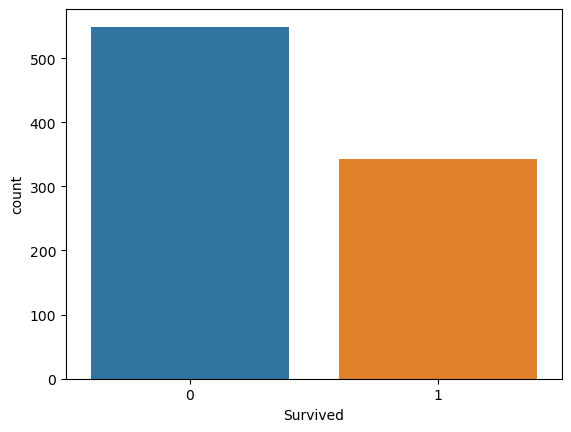

In [7]:
# Anzahl der Überlebenden (1) und der Verstorbenen (0) im Trainingsdatensatz
sns.countplot(x="Survived", data=df_train)
plt.show()

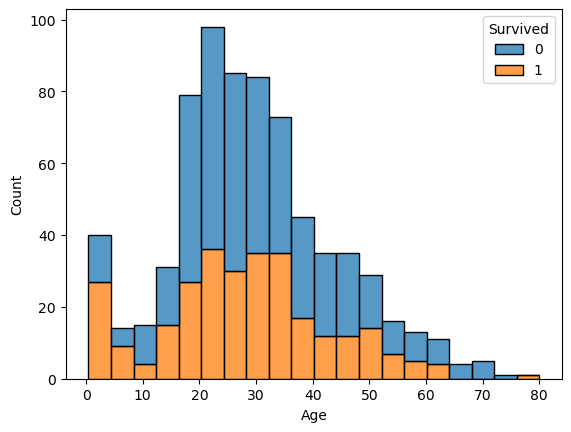

In [8]:
# Verteilung des Alters + Unterscheidung nach Überlebenden und Verstorbenen
# hue="Survived" -> Unterscheidung nach Überlebenden und Verstorbenen
# multiple="stack" -> Stacked Histogramm
# bins=25 -> Anzahl der Säulen
sns.histplot(x="Age", hue="Survived", data=df_train, multiple="stack", bins=20)
plt.show()

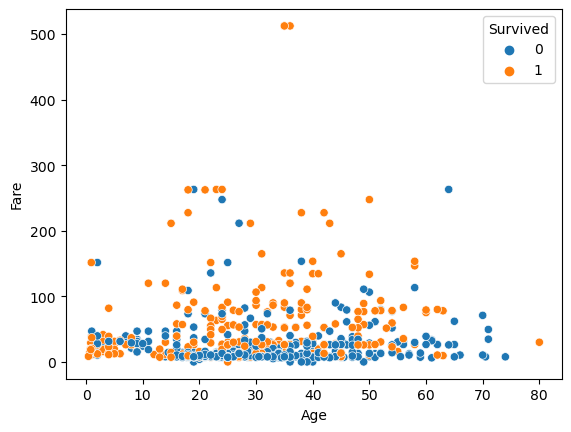

In [9]:
# Scatterplot der Ticketpreise (y) und des Alters (x) + Unterscheidung nach Überlebenden und Verstorbenen
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df_train)
plt.show()

# Höhere ticketpreise -> höhere Überlebenswahrscheinlichkeit? -> Statistische Auswertung (z.B. Korrelationsmatrix) notwendig

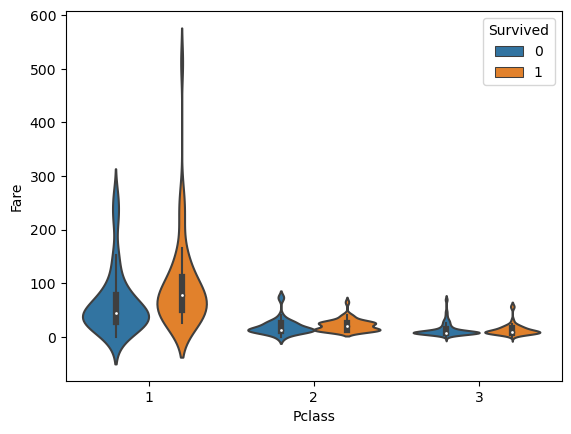

In [10]:
# Verteilung der Ticketpreise + Unterscheidung nach Überlebenden und Verstorbenen + Unterscheidung nach Ticketklasse
sns.violinplot(x="Pclass", y="Fare", hue="Survived", data=df_train)
plt.show()

# 1. Klasse deutlich teurer

In [11]:
# Gruppieren nach Einstiegsort
df_train.groupby(by="Embarked").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


Beispielerkenntnisse:


*   Passagiere, die in Cherbourg (C) eingestiegen sind, haben im Schnitt mehr für ihr Ticket gezahlt und waren in einer besseren Klasse
*   Im Schnitt haben mehr dieser Passagiere überlebt 
*   Passagiere aus Southhampton hatten durchschnittlich mehr Geschwister / Partner an Bord
*   etc.


### Weitere interessante Analysen:


*   Überlebende nach Geschlecht darstellen
*   Auswirkung von der Anzahl an Geschwistern / Eltern / Kinder
*   Einfluss der Kabinenbezeichnung (A,B,C...)
*   Korrelationen analysieren
*   ...

## Erste Vorhersagen

### Zufällig

In [12]:
# Zufällige Vorhersage (0 oder 1)
prediction = np.random.randint(2, size=len(df_test)) 
# Vorhergesagte Werte sind als Array gespeichert
print(prediction)

[0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 1 0 0 1 0 1 0 1 0]


In [13]:
# Array wird in einen Dataframe umgewandelt und mit den Indexwerten des Testdatensatzes versehen
df_test_prediction = pd.DataFrame(prediction, index=df_test.index, columns=["Survived"])
df_test_prediction

,Survived
PassengerId,
892,0
893,1
894,0
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [14]:
# Vorhersage als CSV speichern -> evtl. muss Pfad angepasst werden
df_test_prediction.to_csv(r"Outputdaten/prediction_random.csv")

Erstes Ergebnis testen:
*   https://www.kaggle.com/competitions/titanic/submissions
*   "Submit Predictions"
*   "prediction_random.csv" auswählen
*   "Submit"
*   Score: ~0.5

=> ca. 50% der Passagiere wurden korrekt vorhergesagt

### Alle sterben

In [15]:
# 0-Werte für die Länge von df_test als int
prediction = np.zeros(len(df_test), dtype=int)

# Array wird in einen Dataframe umgewandelt und mit den Indexwerten des Testdatensatzes versehen
df_test_prediction = pd.DataFrame(prediction, index=df_test.index, columns=["Survived"])

# Vorhersage als CSV speichern -> evtl. muss Pfad angepasst werden
df_test_prediction.to_csv(r"Outputdaten/prediction_dead.csv")

df_test_prediction.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


Score: 0.62

### Tipp: Alle weiblichen Passagiere als überlebend vorhersagen

## Feature Engineering

Viele Machine Learning Algorithmen können nur mit Zahlen umgehen. Daher müssen die Daten vorbereitet werden.

Außerdem können neue Features erstellt werden, die die Vorhersage verbessern können.

### Daten bereinigen

Beispiele:

*   z.B. "Age" mit Mittelwert füllen -> andere Methoden möglich
*   z.B. "Embarked" mit häufigstem Wert füllen -> andere Methoden möglich
*   "Cabin" ?

### Neue Features erstellen

Beispiele:

*   "Title" aus "Name" extrahieren
*   "FamilySize" aus "SibSp" und "Parch" erstellen
*   "IsAlone" aus "FamilySize" erstellen
*   "Age" in "AgeGroup" umwandeln
*   "Fare" in "FareGroup" umwandeln

### Daten in Zahlen umwandeln

Beispiele:
*   "Sex" in 0 und 1 umwandeln
*   "Embarked" in 0, 1 und 2 umwandeln
*   One-Hot-Encoding für "Embarked" -> neue Spalten erstellen
*   ...

### WICHTIG: Auch Trainingsdaten müssen angepasst werden
*   wenn neue Features erstellt werden müssen diese auch für die Trainingsdaten erstellt werden
*   wenn Daten bereinigt werden müssen diese auch für die Trainingsdaten bereinigt werden
*   manche Daten sind in den Trainingsdaten vollständig, in den Testdaten jedoch nicht (z.B. Fare)
    -> beide Dataframes müssen analysiert werden
*   ...

In [16]:
# Geschlecht in numerische Werte umwandeln
# => 0 = männlich, 1 = weiblich

df_train["Sex"] = df_train["Sex"].map({"male":0, "female":1})

# Auch df_test muss umgewandelt werden
df_test["Sex"] = df_test["Sex"].map({"male":0, "female":1})

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Fehlende Werte in der Spalte "Age" durch den Mittelwert ersetzen
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())

# Anzahl der fehlenden Werte in der Spalte "Age"
print(df_train["Age"].isnull().sum())
print(df_test["Age"].isnull().sum())

0
0


In [18]:
# Testdatensatz auf fehlende Werte überprüfen
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [19]:
# Fare hat einen fehlenden Wert, der bereinigt werden muss
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

## Machine Learning

### Trainingsdaten und Testdaten

*   Trainingsdaten: Daten, mit denen der Algorithmus trainiert wird
*   Testdaten: Daten, mit denen der Algorithmus getestet wird

### Machine Learning Algorithmus

*   Übersicht verschiedener Modelle: https://scikit-learn.org/stable/supervised_learning.html
*   Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
*   Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
*   ...

### Vorhersagen

*   https://www.kaggle.com/competitions/titanic/submissions
*   "Submit Predictions"
*   CSV auswählen
*   "Submit"

### Verbesserungen

*   Feature Engineering
*   Machine Learning Algorithmus
*   Parameter Fine Tuning
*   ...

In [20]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

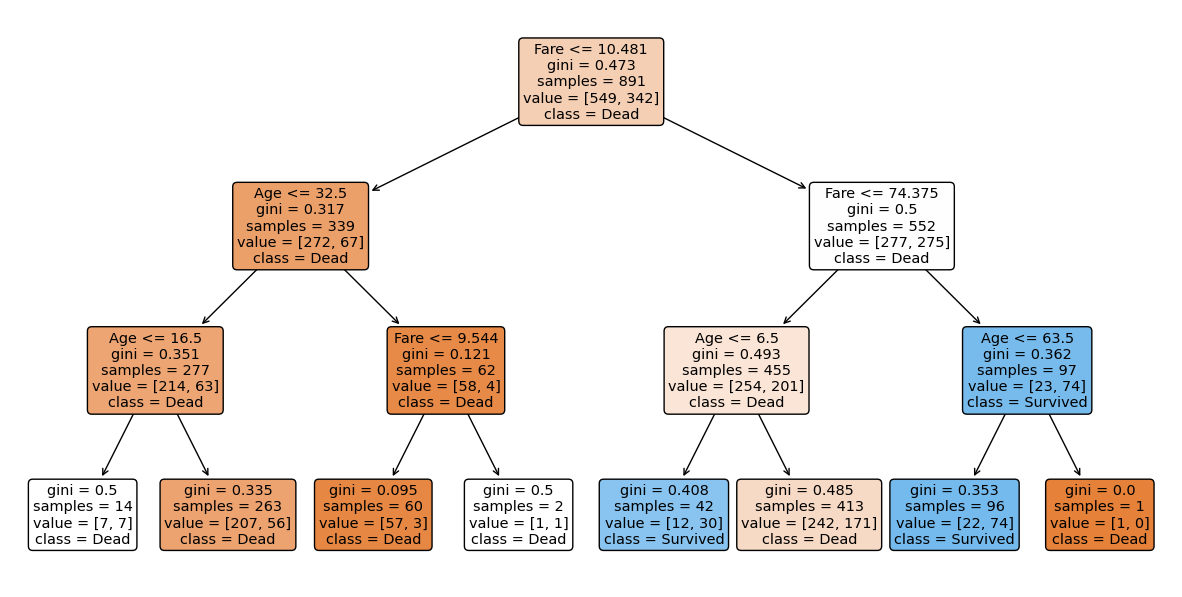

In [21]:
# perform Decision Tree Algorithmus
# Zielvariable: "Survived"
# Test mit drei Features: "Sex", "Age", "Fare"

X_train = df_train[["Age","Fare"]]
# Features (Spalten) aus dem Trainingsdatensatz
# Spalte "Survived" wird nicht benötigt
# axis=1 -> Spalten

y_train = df_train["Survived"] # Zielvariable (Spalte) aus dem Trainingsdatensatz

# Decision Tree Algorithmus
# max_depth=3 -> maximale Tiefe des Baumes
# random_state=0 -> zufällige Auswahl der Datenpunkte

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train) # Training des Algorithmus

# Visualisierung des Baumes
plt.figure(figsize=(15,7.5))
plot_tree(tree, filled=True, rounded=True, class_names=["Dead","Survived"], feature_names=X_train.columns)
plt.show()

In [22]:
# Decision Tree Modell auf Testdatensatz anwenden
X_test = df_test[["Age","Fare"]]

prediction = tree.predict(X_test) # Vorhersage
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0]


In [23]:
# Array wird in einen Dataframe umgewandelt und mit den Indexwerten des Testdatensatzes versehen
df_test_prediction = pd.DataFrame(prediction, index=df_test.index, columns=["Survived"])

# Vorhersage als CSV speichern -> evtl. muss Pfad angepasst werden
df_test_prediction.to_csv(r"Outputdaten/prediction_decision_tree_1.csv")

df_test_prediction.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


Score: 0,64

-> Tipp: Wird es mit mehr Features besser? Welche Features haben einen sehr starken Einfluss auf die Überlebenswahrscheinlichkeit?

## To-Dos / Tipps:
*   Besseres Verständnis der Daten durch Datenanalyse
*   Daten bereinigen
*   Feature Engineering -> neue Features erstellen / Features anpassen
*   Verschiedene Machine Learning Algorithmen testen (Random Forest, Decision Tree, ...)
*   Parameter Fine Tuning (z.B. max_depth bei Decision Tree anpassen)
*   Verschiedene Features testen (z.B. "Title" aus "Name" extrahieren)
*   Viele Versuche durchführen und vergleichen
*   Möglichst genaue Vorhersagen bekommen
*   **Spaß haben und möglichst viel lernen**